In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.15


In [2]:
images=image.load_images('data/digits')

[0]: 178 files found
[1]: 182 files found
[2]: 177 files found
[3]: 183 files found
[4]: 181 files found
[5]: 182 files found
[6]: 181 files found
[7]: 179 files found
[8]: 174 files found
[9]: 180 files found


In [3]:
data=image.images_to_vectors(images)
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [  0.00000000e+00   4.71341124e+00   8.25158598e+01   1.88401224e+02
   1.88589872e+02   9.17840846e+01   2.15581525e+01   2.04785754e+00
   8.51419032e-02   3.14913745e+01   1.65203116e+02   1.90677240e+02
   1.63504174e+02   1.30023372e+02   2.92036728e+01   1.70005565e+00
   4.22927101e-02   4.11185309e+01   1.57575960e+02   1.11080690e+02
   1.12814691e+02   1.24173066e+02   2.82609905e+01   7.82971619e-01
   1.66944908e-02   3.90011130e+01   1.44642181e+02   1.40286589e+02
   1.58007791e+02   1.20022816e+02   3.66889260e+01   3.33889816e-02
   0.00000000e+00   3.70083472e+01   1.21928770e+02   1.44347245e+02
   1.63978854e+02   1.39081803e+02   4.60222593e+01   0.00000000e+00
   1.37451308e-01   2.49860879e+01   1.09460768e+02   1.14961046e+02
   1.21993879e+02   1

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


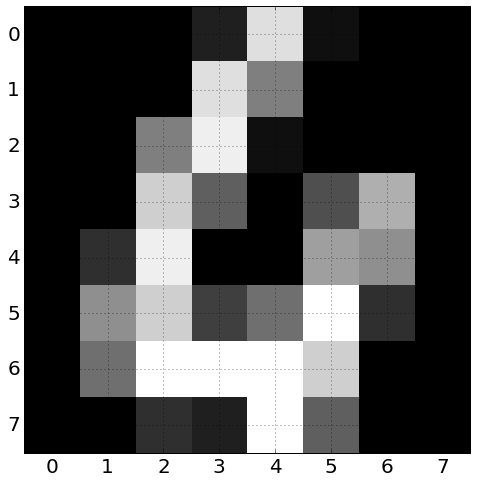

In [4]:
data_train,data_test=split(data)
image.vector_to_image(data_train.vectors[800,:],(8,8))

## Do Perceptron First

In [5]:
C=Perceptron()

In [6]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.07055115699768066 seconds ')


In [7]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 98.886414253897541)
('On Test Set:', 93.555555555555557)


In [8]:
data_train.target_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

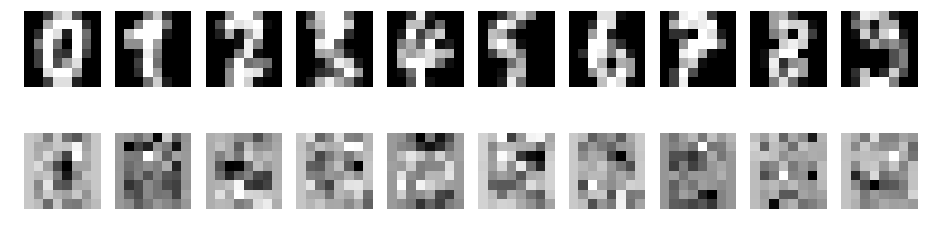

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
for i,t in enumerate(data_train.target_names):
    plt.subplot(2,10,i+1)
    vector=random_vector(data_train,t)
    image.vector_to_image(vector,(8,8))
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    image.vector_to_image(C.weights[i,:],(8,8))
    plt.axis('off')
    

## Do Backprop

In [10]:
C=BackProp(hidden_layer_sizes = [12])

In [11]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.26855993270874023 seconds ')


In [12]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 100.0)
('On Test Set:', 95.333333333333343)


In [13]:
len(C.layers_coef_)

2

In [14]:
C.layers_coef_[0].shape,C.layers_coef_[1].shape

((64, 12), (12, 10))